<a href="https://colab.research.google.com/github/sabilats/sabilats3333210027/blob/main/Forecasting_Sabila_Tera_Suherman_3333210027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/whenamancodes/airbnb-inc-stock-market-analysis

In [32]:
# https://drive.google.com/file/d/1MoVKXRQgIpAVCuL11fISiswCpLrN6-d2/view?usp=sharing

!gdown 1MoVKXRQgIpAVCuL11fISiswCpLrN6-d2

Downloading...
From: https://drive.google.com/uc?id=1MoVKXRQgIpAVCuL11fISiswCpLrN6-d2
To: /content/ABNB.csv
100% 33.6k/33.6k [00:00<00:00, 99.8MB/s]


In [33]:
train_data = pd.read_csv('ABNB.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


Untuk melihat data date time

Check missing values

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       454 non-null    object 
 1   Open       454 non-null    float64
 2   High       454 non-null    float64
 3   Low        454 non-null    float64
 4   Close      454 non-null    float64
 5   Adj Close  454 non-null    float64
 6   Volume     454 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 25.0+ KB


semua panjang datanya sama, tidak ada missing value

Check statistic vales for every features

In [35]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,454.000000,454.000000,454.000000,454.000000,454.000000,4.540000e+02
mean,152.735925,156.465595,148.969855,152.729185,152.729185,6.690328e+06
std,28.340932,29.107813,27.490223,28.226659,28.226659,4.417387e+06
min,88.879997,91.459999,86.709999,89.080002,89.080002,1.995400e+06
25%,136.821507,139.842495,132.920002,135.955002,135.955002,4.114375e+06
50%,154.932495,159.099998,151.230004,155.654999,155.654999,5.450000e+06
75%,172.556507,175.974998,168.595005,171.744996,171.744996,7.631375e+06
max,216.240005,219.940002,209.089996,216.839996,216.839996,3.975500e+07


Handle datetime data for time series

In [36]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


untuk merubah indexnya sebagai hari dan tanggal

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

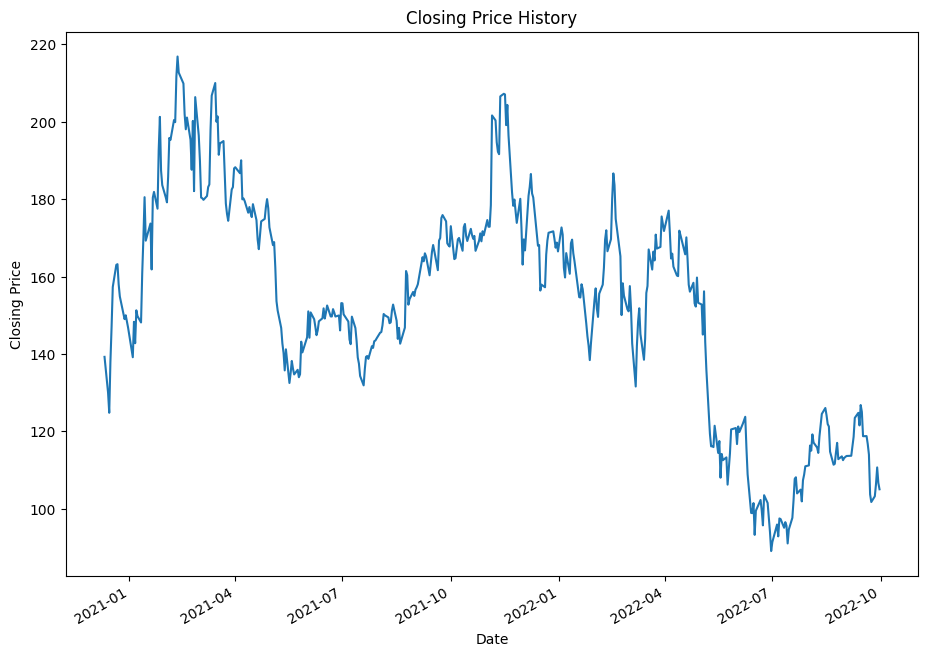

In [37]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

uniqlo memiliki volume yang fluktuatif tetapi cenderung turun pada 2022-04

<Figure size 1600x800 with 0 Axes>

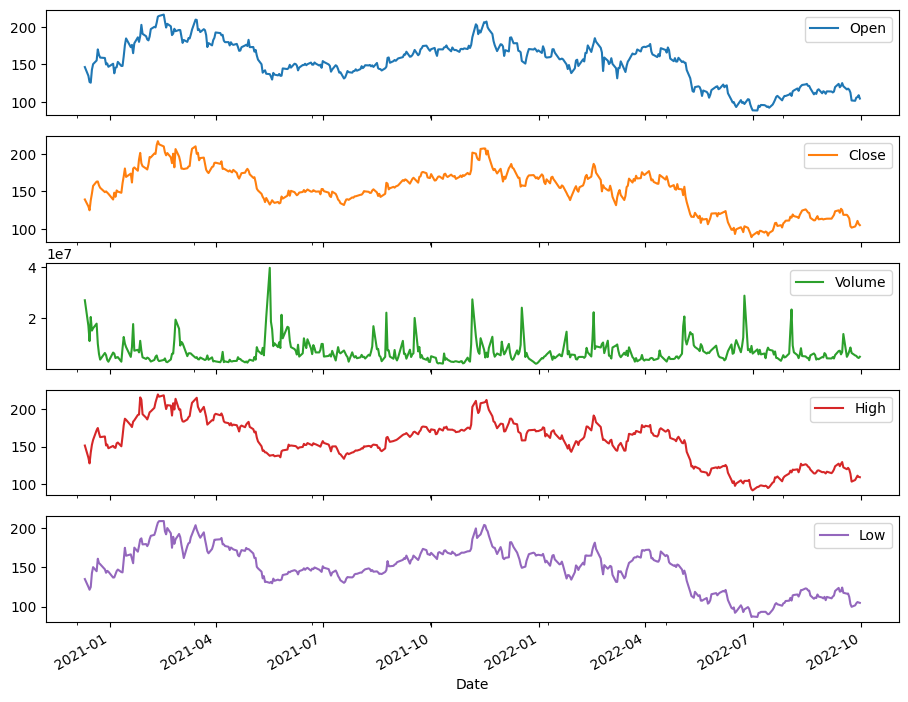

In [39]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

trend menunjukkan penurunan seperti close price. Volume menunjukkan fluaktif yang berarti

In [62]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

In [63]:
df = train_data[['HL_PCT', 'PCT_change','Adj Close', 'Volume']]

In [64]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

23


<ipython-input-64-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


mmebuat label berdasarkan harga penutupan saham (Adj Close) pada hari itu

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

memanggil beberapa model dari library sklearn.

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [66]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-66-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


berfungsi untuk menormalkan data (normalisasi data) agar data rangenya tidak terlalu jauh

In [67]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

untuk menentukan x dan y nya (slicing)

In [68]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-68-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selanjutnya spliting data

In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [71]:
lr_confidence

0.4540321572045476

In [72]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

model berbentuk pohon dan nanti dipilih pohon yang paling bagus untuk testingnya

In [73]:
rf_confidence

0.5280578215796699

In [74]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-74-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-74-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-74-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

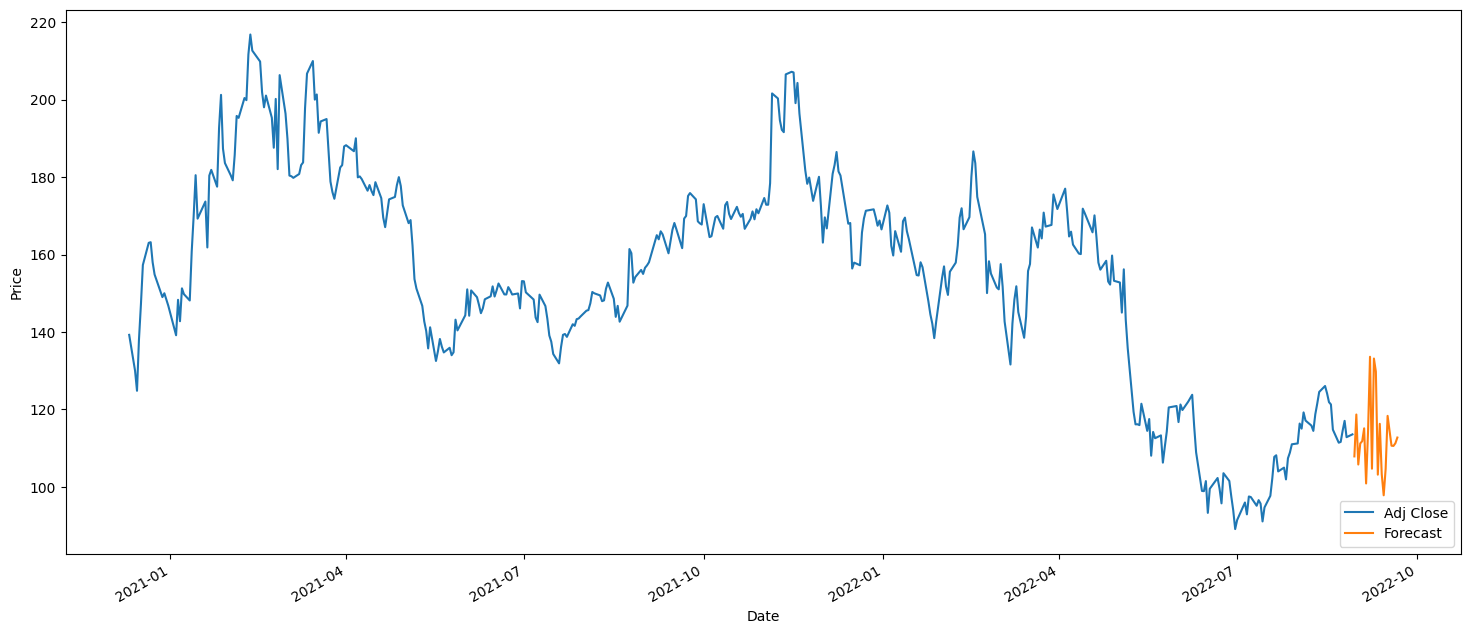

In [75]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

prediksi selanjutnya akan mengalami kenaikan dibanding bulan sebelumnya.